Когда мы анализируем временные ряды, одной из главных целей является
предсказание будущих значений на основе имеющихся данных. Например, если у нас есть
статистика продаж зонтов за несколько лет, мы хотим понять, сколько зонтов потребуется
в следующем месяце. Для таких задач используются модели ARIMA и SARIMA, которые
помогают находить закономерности во временных рядах и строить прогнозы.

Почему обычные методы прогнозирования не работают?

Можно попробовать простые методы, например, усреднить данные за прошлый
месяц и предположить, что в следующем месяце продажи будут такими же. Однако такой
метод игнорирует тренды и сезонные колебания, из-за чего прогноз может быть неточным.
Например, если в октябре продажи зонтов были высокими из-за дождей, а в ноябре
они всегда снижаются, среднее значение октября не даст правильного прогноза на
следующий месяц. Нужен метод, который учитывает динамику данных — именно этим и
занимаются ARIMA и SARIMA.

Что делает ARIMA?

Модель ARIMA (AutoRegressive Integrated Moving Average) анализирует временной ряд и
ищет три типа закономерностей:
1. Авторегрессия (AR) – связь текущего значения с прошлыми наблюдениями. Если в
прошлый месяц продажи зонтов выросли, это может повлиять на текущие продажи.
2. Интегрирование (I) – устранение тренда, чтобы данные стали более стабильными.
Например, если количество проданных зонтов в среднем растет из года в год, модель
"вычитает" этот тренд, делая ряд более предсказуемым.
3. Скользящее среднее (MA) – анализ случайных скачков и сглаживание данных, чтобы не
реагировать на единичные выбросы.

Проще говоря, ARIMA помогает находить устойчивые закономерности, исключает
случайные колебания и использует прошлые значения для предсказания будущих.

Пример применения ARIMA

Представим, что у нас есть данные о продажах зонтов за последние два года, и мы
хотим предсказать спрос на следующий месяц. Мы можем использовать ARIMA, чтобы
построить прогноз.

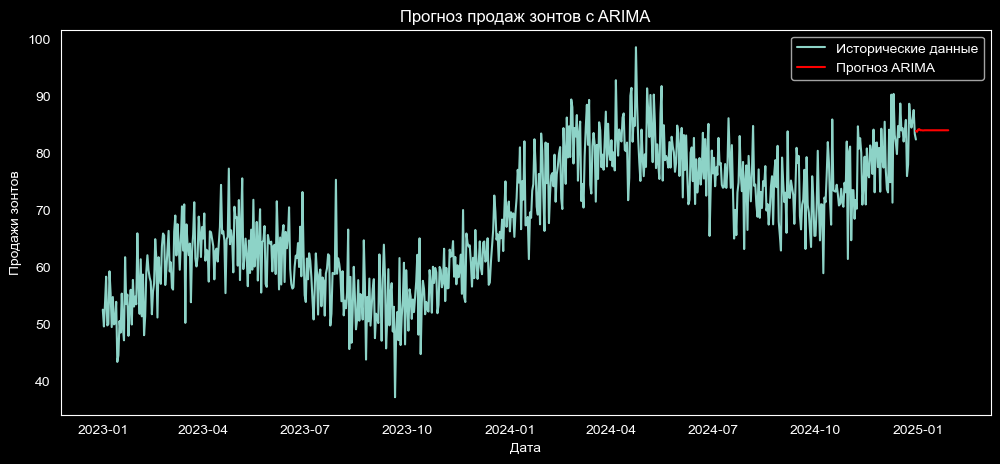

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# Генерация данных (2 года продаж)
np.random.seed(42)
days = pd.date_range(start="2023-01-01", periods=730, freq="D")
sales = 50 + 0.05 * np.arange(730) + 10 * np.sin(2 * np.pi * np.arange(730) / 365) + np.random.normal(scale=5, size=730)
df = pd.DataFrame({"Date": days, "Umbrella Sales": sales})
# Обучение модели ARIMA
model = ARIMA(df["Umbrella Sales"], order=(5, 1, 2)) # Параметры ARIMA подбираются экспериментально
model_fit = model.fit()
# Прогноз на 30 дней вперед
forecast = model_fit.forecast(steps=30)
# Визуализация
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Umbrella Sales"], label="Исторические данные")
plt.plot(pd.date_range(df["Date"].iloc[-1], periods=30, freq="D"), forecast, label="Прогноз ARIMA", color="red")
plt.xlabel("Дата")
plt.ylabel("Продажи зонтов")
plt.title("Прогноз продаж зонтов с ARIMA")
plt.legend()
plt.grid()
plt.show()

Как работает этот код?
- Мы создаем временной ряд с продажами зонтов.
- Обучаем модель ARIMA, используя прошлые данные.
- Прогнозируем продажи на 30 дней вперед.
- Строим график, где красной линией показан прогноз.

Чем SARIMA лучше ARIMA?

SARIMA превосходит ARIMA в случаях, когда данные демонстрируют выраженные
сезонные колебания, которые повторяются через определённые интервалы времени. Если,
например, спрос на зонты стабильно растёт осенью и снижается летом, ARIMA не сможет
правильно обработать этот паттерн, поскольку она в первую очередь ориентирована на
анализ трендов и краткосрочных зависимостей, но не учитывает циклические повторения,
связанные с сезонностью.

SARIMA решает эту проблему за счёт специального сезонного компонента, который
отслеживает, как значения изменяются через фиксированные промежутки времени. Это
позволяет модели выявлять закономерности, связанные с природными, экономическими
или социальными циклами. Например, если в прошлые годы продажи зонтов всегда
достигали пика в октябре и ноябре, SARIMA зафиксирует этот паттерн и учтёт его при
прогнозировании будущих значений.

Такой подход особенно полезен при анализе данных, в которых повторяющиеся
колебания неизбежны. Например, продажи товаров, зависящих от времени года, таких как
зонты или новогодние украшения, следуют чётко выраженной сезонной динамике. В
случае прогноза температуры воздуха сезонность также играет ключевую роль, поскольку
погодные условия повторяются из года в год, и предсказания без учёта этого фактора
окажутся неточными. Кроме того, SARIMA помогает анализировать данные о нагрузке на
серверы, так как рабочая активность пользователей подчиняется недельным и месячным
циклам: в будние дни загрузка выше, а в выходные снижается.

Главное преимущество SARIMA перед ARIMA заключается в том, что она позволяет
не просто отслеживать общее направление изменений во временном ряду, но и учитывать
долгосрочные повторяющиеся паттерны. Это делает её особенно эффективной в случаях,
когда наблюдаемые данные зависят от временных циклов и без их учёта невозможно
построить точный прогноз.

Пример применения SARIMA

Допустим, у нас есть данные о продажах зонтов, которые повторяются каждый год.
Мы можем использовать SARIMA, чтобы учесть сезонные колебания.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Примерные данные
np.random.seed(42)
days = pd.date_range(start="2023-01-01", periods=730, freq="D")
sales = 50 + 0.05 * np.arange(730) + 10 * np.sin(2 * np.pi * np.arange(730) / 365) +np.random.normal(scale=5, size=730)
df = pd.DataFrame({"Date": days, "Umbrella Sales": sales})
# Обучение модели SARIMA
model_sarima = SARIMAX(df["Umbrella Sales"], order=(5, 1, 2), seasonal_order=(1, 1, 1, 365))
model_sarima_fit = model_sarima.fit()
# Прогноз на 30 дней вперед
forecast_sarima = model_sarima_fit.get_forecast(steps=30)
forecast_mean = forecast_sarima.predicted_mean
# Визуализация
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Umbrella Sales"], label="Исторические данные")
plt.plot(pd.date_range(df["Date"].iloc[-1], periods=30, freq="D"), forecast_mean, label="Прогноз SARIMA",color="green")
plt.xlabel("Дата")
plt.ylabel("Продажи зонтов")
plt.title("Прогноз продаж зонтов с SARIMA")
plt.legend()
plt.grid()
plt.show()

Как работает SARIMA?

SARIMA расширяет возможности модели ARIMA за счёт добавления сезонного
компонента. В реальных данных сезонность — это повторяющийся паттерн, который
наблюдается через определённые интервалы времени. Например, спрос на зонты
возрастает осенью и весной, когда идут дожди, и падает летом, когда погода более сухая.
Если использовать обычную ARIMA-модель, она может не справиться с таким типом
данных, так как она в первую очередь ориентирована на выявление трендов и случайных
колебаний.

SARIMA, в отличие от ARIMA, учитывает не только краткосрочные и долгосрочные
зависимости, но и повторяющиеся сезонные циклы. Например, если в прошлые годы
осенью продажи зонтов всегда увеличивались, SARIMA «замечает» этот паттерн и
использует его при прогнозировании. Чтобы учесть сезонность, модель строит
дополнительные параметры, которые анализируют, как значения меняются через
определённые промежутки времени.

Когда мы используем SARIMA, у нас появляются два набора параметров: один
отвечает за обычную динамику временного ряда, а другой — за сезонные колебания.
Например, в настройке `seasonal_order=(1, 1, 1, 365)` параметр 365 означает, что сезонные
изменения повторяются каждые 365 дней. Это полезно, когда анализируются годовые
циклы. Если мы имеем дело с ежемесячными данными, этот параметр может быть равен
12, так как сезонность повторяется раз в год, но в масштабе месяцев.

Благодаря такому подходу модель может учитывать как небольшие колебания
спроса на зонты в течение нескольких дней, так и долгосрочные сезонные
закономерности, которые повторяются из года в год. Например, если в прошлом ноябре
продажи резко выросли, SARIMA предскажет, что в следующем ноябре тоже можно
ожидать увеличения спроса. Это особенно полезно в бизнесе, где сезонные тренды могут
сильно влиять на продажи.

SARIMA также помогает выявлять циклы, которые не связаны с календарными
сезонами, но всё же повторяются. Например, спрос на определённые товары может
увеличиваться каждые несколько недель в зависимости от рекламных кампаний, погоды
или экономических факторов. Эта модель умеет отличать такие закономерности от
случайных шумов, что делает её мощным инструментом для прогнозирования в самых
разных областях: от торговли и финансов до метеорологии и логистики.

Вывод:
- ARIMA подходит, если данные имеют тренд, но не выраженную сезонность.
- SARIMA лучше, если есть сезонные колебания (ежемесячные, годовые циклы).
- Обе модели помогают делать точные прогнозы, анализируя прошлые данные.

Если владелец магазина знает, что продажи зонтов осенью всегда растут, а летом
падают, он может заранее закупить товар и оптимизировать цены. Таким образом, модели
временных рядов становятся инструментом для бизнеса, науки и аналитики.

Прогнозирование с помощью машинного обучения

Прогнозирование с помощью машинного обучения — одна из ключевых задач, в
которой алгоритмы анализируют исторические данные и выявляют закономерности для
предсказания будущих событий. Это применяется в самых разных областях: от финансов и
медицины до маркетинга и промышленности. В финансах модели прогнозирования
помогают оценивать колебания фондового рынка, предсказывать кредитные риски и
управлять инвестициями. В медицине машинное обучение используется для предсказания
вероятности развития заболеваний на основе медицинских показателей пациента. В
маркетинге алгоритмы позволяют анализировать покупательское поведение и
предсказывать спрос на товары, а в промышленности — предотвращать поломки
оборудования за счет анализа показаний датчиков и выявления аномалий.

Для решения задачи прогнозирования можно использовать различные модели,
такие как линейная регрессия, деревья решений, случайный лес и нейросети. Выбор
модели зависит от сложности данных, их объема и требуемой точности. Линейная
регрессия подходит для задач, где зависимость между переменными является простой и
линейной. Деревья решений и случайный лес эффективны в ситуациях, где данные
содержат сложные зависимости и нелинейности. Нейронные сети особенно полезны при
работе с большими объемами данных, например, в обработке временных рядов или
анализе изображений.

Процесс прогнозирования с помощью машинного обучения начинается с подготовки
данных. На этом этапе важно собрать релевантные исторические данные, очистить их от
выбросов и пропущенных значений, а также привести в удобный формат для обучения
модели. Часто используются методы нормализации и стандартизации данных, чтобы
привести их к единому масштабу и улучшить производительность модели. Например, при
прогнозировании цен на недвижимость данные могут включать площадь квартиры,
количество комнат, местоположение и среднюю стоимость жилья в районе.

После подготовки данных следует этап выбора модели и ее обучения. Данные
делятся на обучающую и тестовую выборки, чтобы проверить, насколько хорошо модель
справляется с предсказаниями на новых данных. Во время обучения алгоритм подбирает
оптимальные параметры, минимизируя ошибку прогноза. Например, при использовании
линейной регрессии модель вычисляет коэффициенты, которые позволяют наилучшим
образом описать зависимость между входными и выходными переменными.

После обучения модель тестируется и оценивается с помощью различных метрик.
Наиболее распространенные метрики для задач прогнозирования включают среднюю
абсолютную ошибку (MAE), среднеквадратичную ошибку (MSE) и коэффициент
детерминации (R²). Эти показатели позволяют понять, насколько точны предсказания
модели и требует ли она доработки. Например, если модель предсказывает объемы
продаж с высокой ошибкой, это может указывать на необходимость использования более
сложного алгоритма или добавления новых признаков, таких как сезонные факторы или
экономические показатели.

Наконец, после успешного тестирования модель внедряется в реальную среду и
используется для предсказаний. В некоторых случаях модели требуют регулярного
обновления, так как данные со временем могут меняться. Например, при прогнозировании
спроса на продукцию в магазине модель должна учитывать новые тренды и сезонные
изменения. Для этого применяются методы онлайн-обучения, при которых модель
периодически обновляется на новых данных.

Рассмотрим прогнозирование с использованием линейной регрессии, которая
хорошо подходит для задач, где зависимость между входными данными и целевой
переменной является линейной.

Сначала необходимо подготовить данные. Это включает загрузку, очистку и
разделение данных на обучающую и тестовую выборки. Например, если у нас есть данные
о продажах компании за последние несколько лет, мы можем спрогнозировать будущие
продажи на основе таких факторов, как сезонность, экономическая ситуация и рекламные
кампании.

В Python для этой задачи можно использовать библиотеку `scikit-learn`. Пример
кода:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Генерация случайных данных: зависимость продаж от рекламного бюджета
np.random.seed(42)
data_size = 100
advertising_budget = np.random.rand(data_size) * 100 # бюджет на рекламу
sales = 5 * advertising_budget + np.random.randn(data_size) * 10 # зависимость с шумом
# Создаем DataFrame
df = pd.DataFrame({'AdvertisingBudget': advertising_budget, 'Sales': sales})
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['AdvertisingBudget']]
y = df['Sales']
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)
# Прогнозирование
y_pred = model.predict(X_test)
# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}")
# Визуализация результатов
plt.scatter(X_test, y_test, label="Actual Sales", color="blue")
plt.plot(X_test, y_pred, label="Predicted Sales", color="red")
plt.xlabel("Advertising Budget")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales Prediction using Linear Regression")
plt.show()

В этом коде сначала создаются синтетические данные, где продажи зависят от
рекламного бюджета с добавлением небольшого случайного шума. Затем данные
разделяются на обучающую и тестовую выборки, после чего обучается модель линейной
регрессии. После предсказания оценивается точность модели с помощью метрик MAE
(средняя абсолютная ошибка) и MSE (среднеквадратичная ошибка). Наконец, строится
график, показывающий фактические и предсказанные значения.

На графике отображены фактические и предсказанные значения продаж в
зависимости от рекламного бюджета.

Что можно увидеть:
- Синие точки представляют реальные данные из тестовой выборки, то есть фактические
продажи при заданном рекламном бюджете. Они распределены с некоторым разбросом
из-за добавленного случайного шума.
- Красная линия — это предсказания модели линейной регрессии. Она показывает, как
модель оценивает зависимость между рекламным бюджетом и продажами, строя
линейную тенденцию.

Выводы:
- Линия предсказаний приближенно отражает тренд данных, показывая, что продажи
увеличиваются с ростом бюджета.
- Разброс точек вокруг линии говорит о наличии случайных факторов, влияющих на
продажи (например, сезонность, конкуренция).
- Если точки сильно отклоняются от линии, это может указывать на недостаточную
точность модели, наличие нелинейных зависимостей или недостающие важные факторы в
данных.

Таким образом, график позволяет визуально оценить, насколько хорошо модель
линейной регрессии справляется с прогнозированием и какие возможны улучшения.

Если данные содержат нелинейные зависимости, можно использовать более
сложные модели, такие как случайный лес или нейросети. Однако линейная регрессия
является хорошей отправной точкой для понимания основ прогнозирования с помощью
машинного обучения.